# Image recognition
All images inside the `TESTFOLDER` are classified based on the given model.

## Prerequisites
For executing the notebook, multiple packages are required.

The package **ImageTransferLearning** has a detailed overview on its contents in the previous jupyter notebook.
The following packages are used in **ImageRecognition.py**:

In [1]:
import math
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
import numpy as np

import ImageTransferLearning

In [2]:
from ImageRecognition import *

## Parameters
* `TESTFOLDER`: folder path for the test images.
* `MODELFOLDER`: folder path of the model. This model folder is used for loading and saving the trained model. Every
* `MODELFILE`: file path of the model.
* `all_classes`: list of all possible classes.
* `batch_size`: the value must be equal to the size of images in the `TESTFOLDER`

In [3]:
# Parameters
TESTFOLDER = './TestImages'
MODELFOLDER = './Models/'
MODELFILE = "ImageTransferLearningNE3BS3LR001ACC94.pth"
FILENEURALNET = MODELFOLDER + MODELFILE
all_classes = ["dog", "flower", "other"]
# batch_size must be same as images
batch_size = 9

## Image loader
It is important that every test image is inside one of the sub folder of `TESTFOLDER` otherwise `ImageFolder` will not work as intended.

In [4]:
test_loader = setupDatasetLoader(TESTFOLDER, batch_size)

### All test images for classification
The following code plots all images that will be classified in the latter steps.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


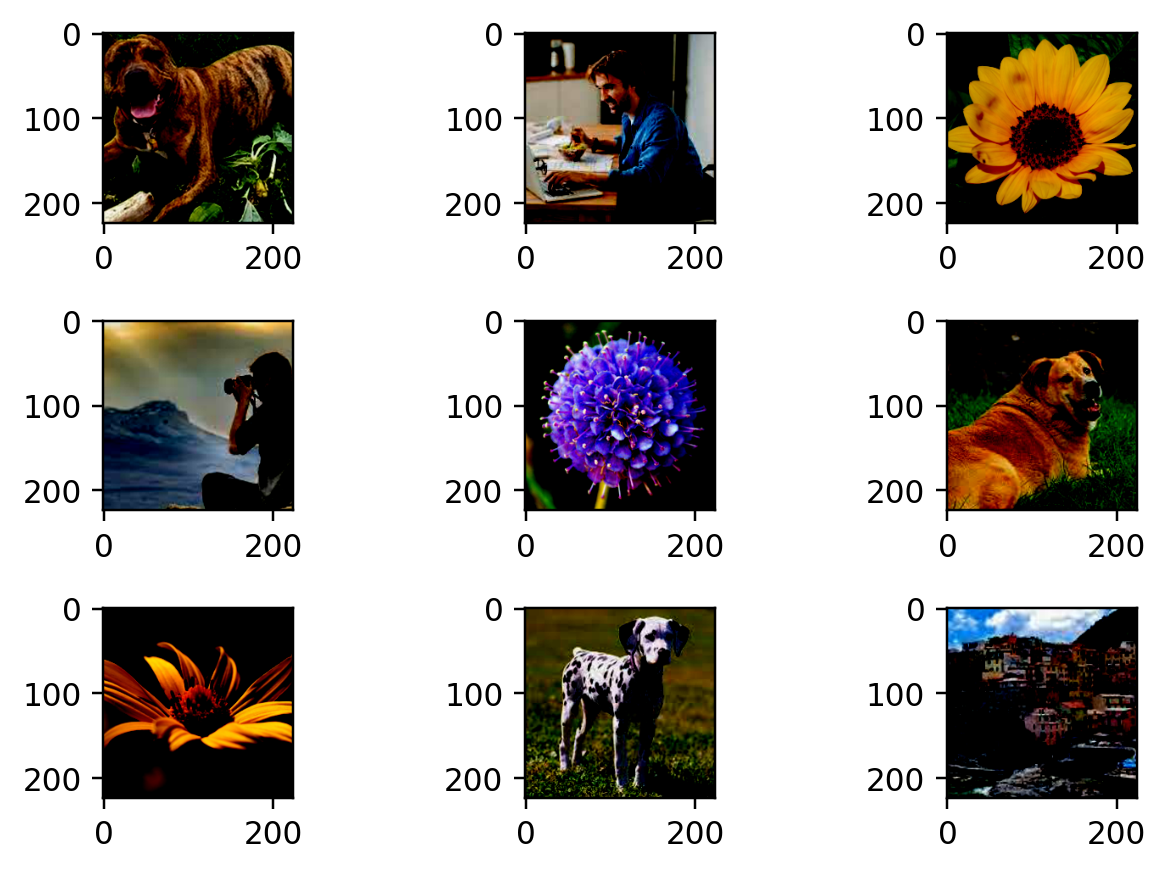

In [5]:
batch_size_sqrt = int(math.sqrt(batch_size))
columns = batch_size_sqrt
rows = batch_size_sqrt
fig, ax = plt.subplots(rows, columns, dpi=224)
ax = ax.ravel()
for i, (image, labels) in enumerate(test_loader):
    if(i == rows):
        break
    for j, (img) in enumerate(image):
        np_array = img.numpy()
        np_array = np_array.swapaxes(0, 2)
        np_array = np.rot90(np_array, 3)
        ax[i*columns+j].imshow(np_array)
fig.tight_layout()
plt.show()

## Loading model

In [6]:
model = setupModel(len(all_classes), FILENEURALNET)

## Using image recognition for classification
* The function will try to create a square sized plot based on the following parameter `batch_size` .
* In the first step a plot gets prepared for the following labelled test images.
* After that every image gets inputted into the model and labelled. At the end a plot with all labelled images is plotted.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


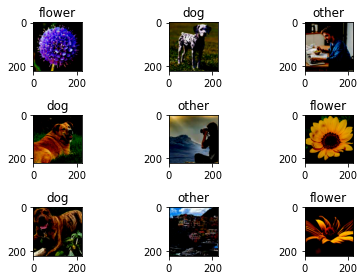

In [7]:
ax, fig = setup(batch_size)
useImageRecognition(test_loader, model, ax, fig)